In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


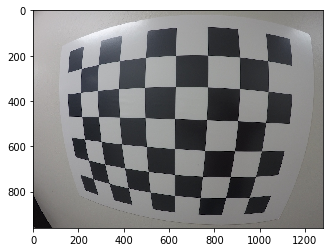

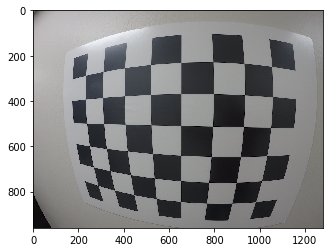

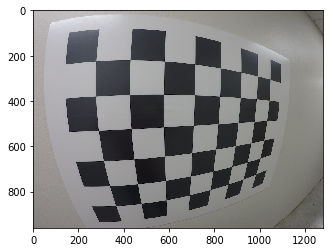

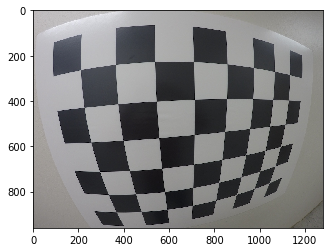

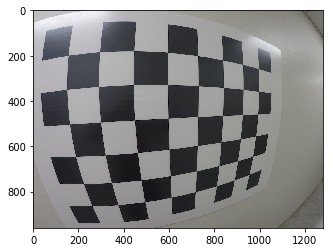

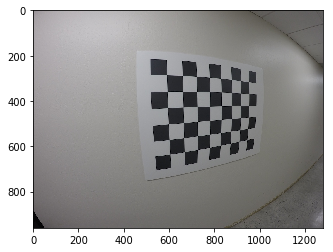

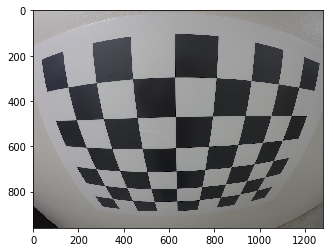

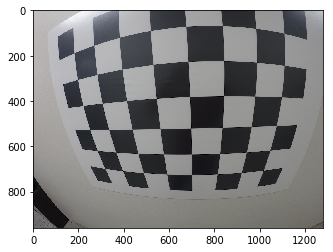

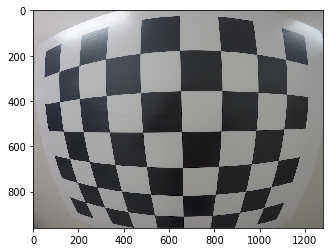

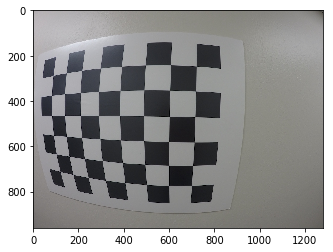

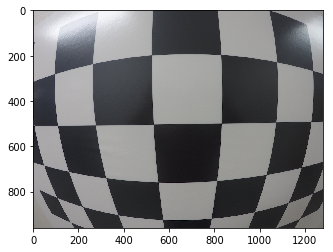

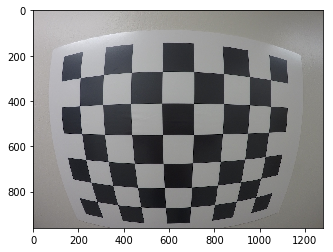

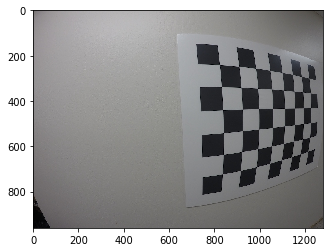

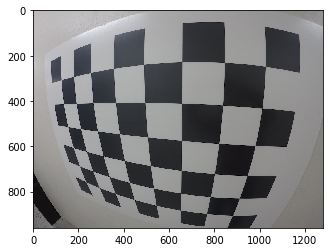

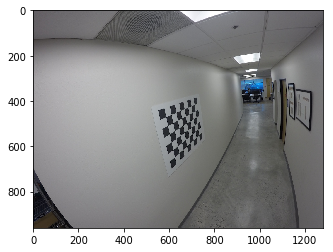

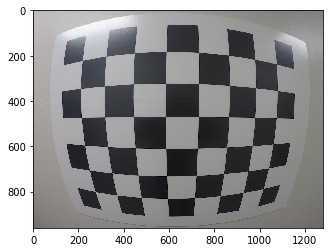

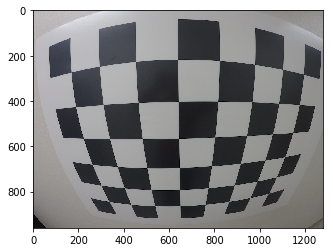

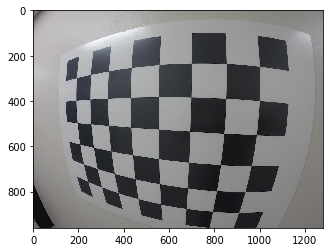

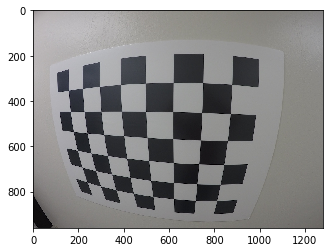

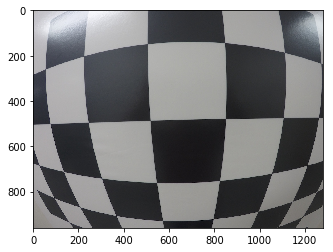

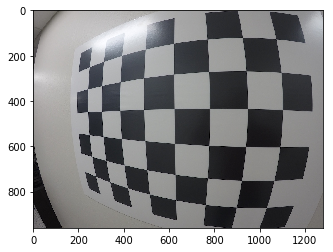

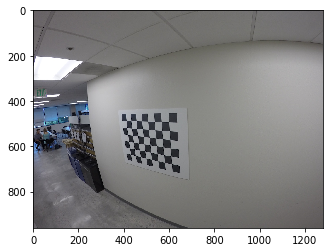

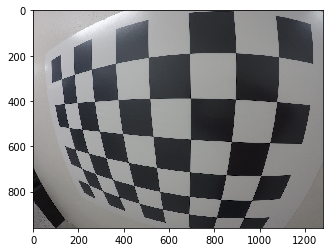

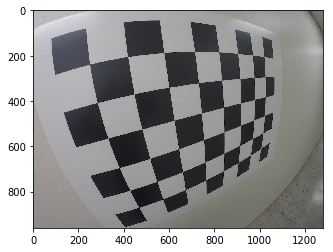

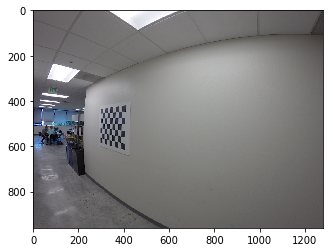

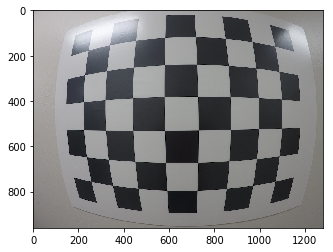

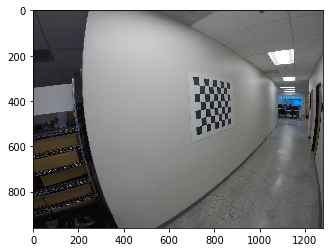

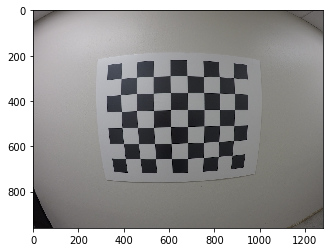

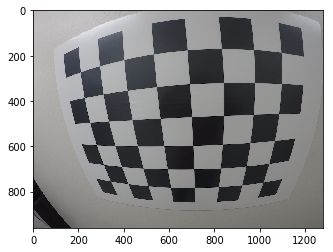

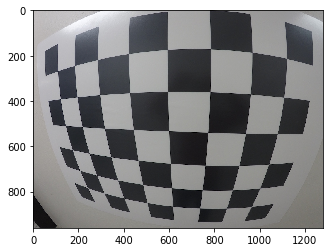

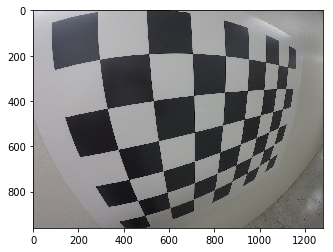

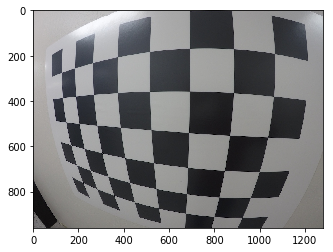

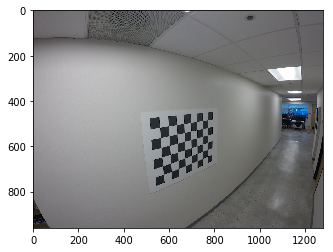

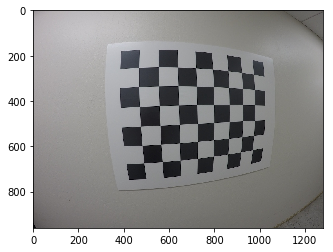

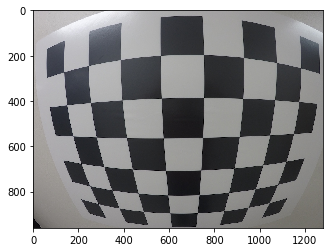

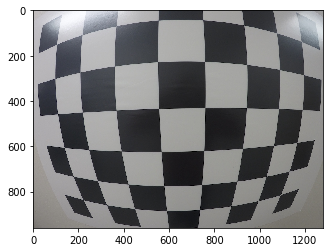

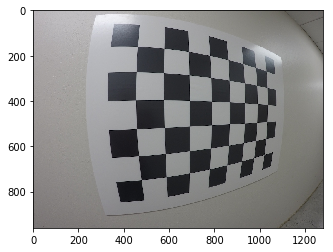

In [6]:
%matplotlib inline
for fname in os.listdir('calibration_wide'):
    if fname.endswith('.jpg'):
        img = cv2.imread(os.path.join('calibration_wide', fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()

In [119]:
nx, ny = 8, 6

def calibrate_camera(image_path, nx, ny):
    
    imgp_list = [] # image points
    
    for n, fname in enumerate(os.listdir(image_path)):
        if fname.endswith('.jpg'):
            img = cv2.imread(os.path.join(image_path, fname))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            ret, corners = cv2.findChessboardCorners(img, (nx, ny))

            if ret:
                cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
                imgp_list.append(corners)

    n_pictures = len(imgp_list)
    imgp_list = np.array(imgp_list)
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    objp_list = np.repeat(objp[None, :, :], n_pictures, axis=0)
    
    retval, cameraMatrix, distCoeffs, rvecs, tvecs = \
    cv2.calibrateCamera(objp_list, imgp_list, img.shape[1::-1], None, None)
    
    return retval, cameraMatrix, distCoeffs, rvecs, tvecs

In [120]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs = calibrate_camera('calibration_wide', 8, 6)

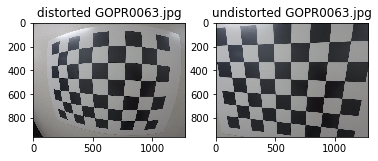

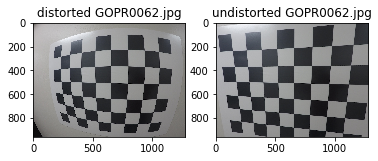

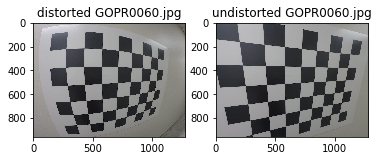

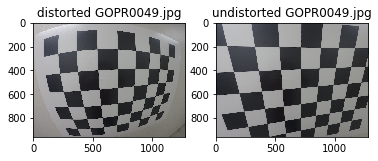

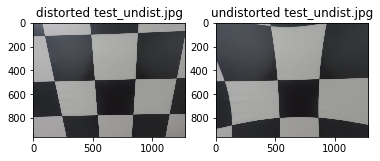

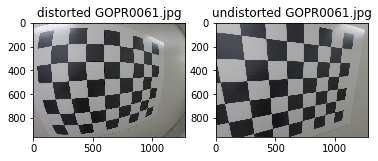

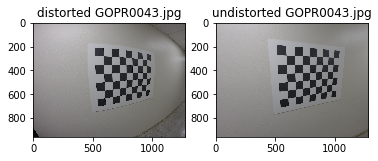

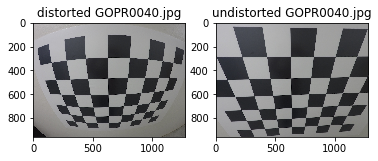

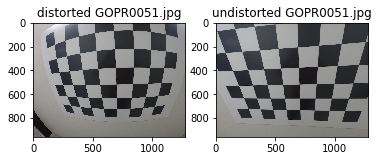

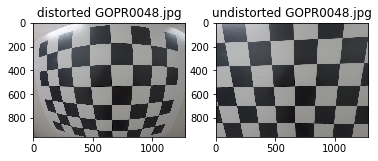

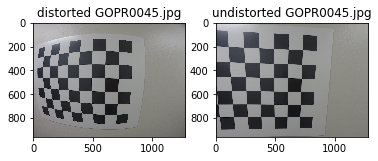

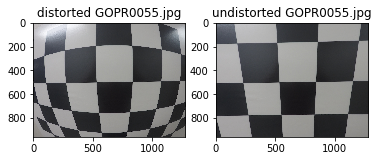

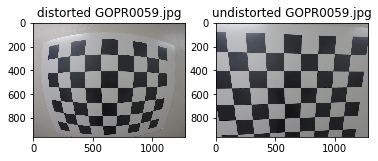

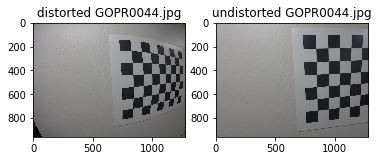

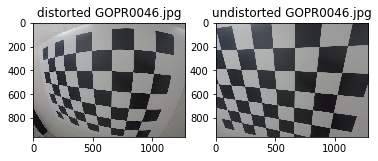

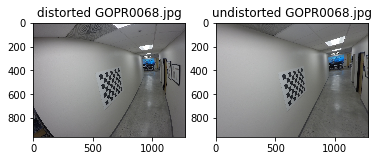

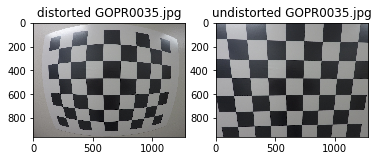

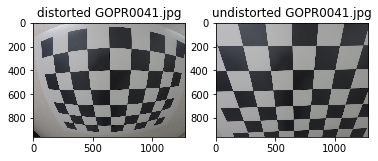

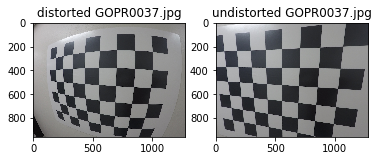

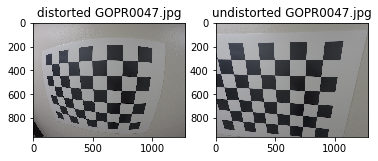

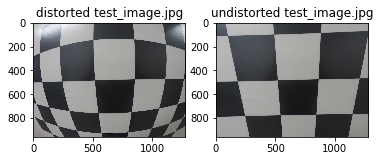

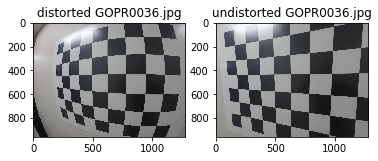

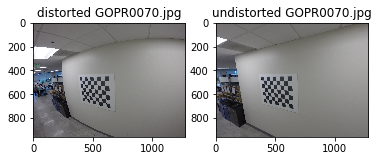

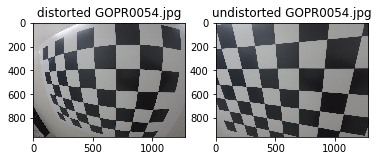

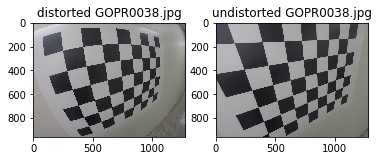

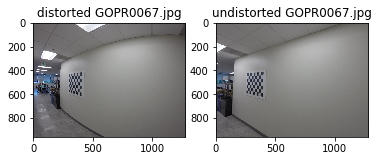

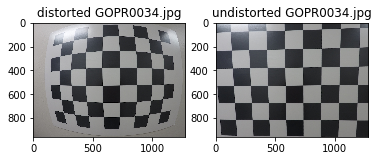

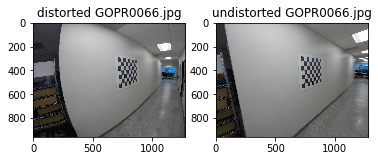

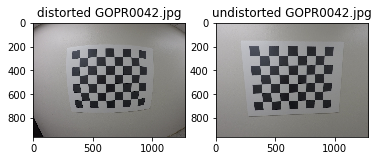

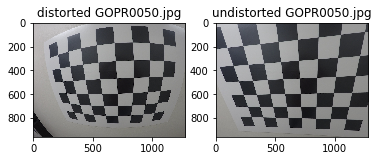

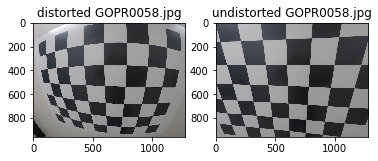

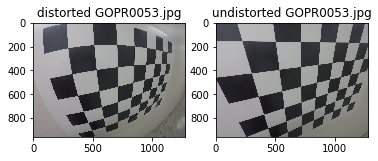

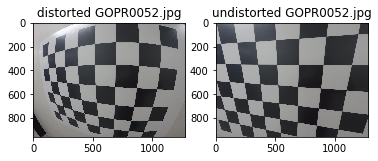

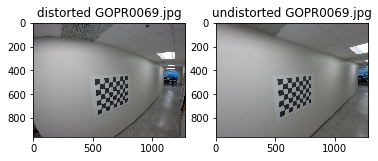

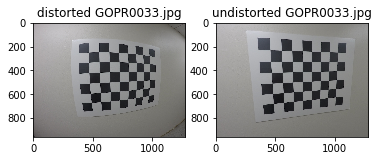

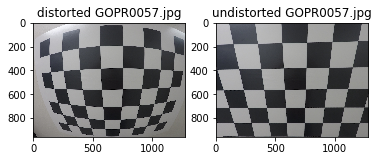

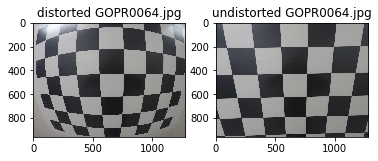

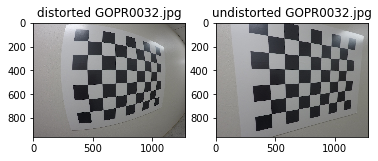

In [118]:
%matplotlib inline
for fname in os.listdir('calibration_wide'):
    if fname.endswith('.jpg') and fname.split('.')[0].split('_')!='test':
        img = cv2.imread(os.path.join('calibration_wide', fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('distorted {}'.format(fname))
        img_undistorted = cv2.undistort(img, cameraMatrix, distCoeffs)
        plt.subplot(1, 2, 2)
        plt.imshow(img_undistorted)
        plt.title('undistorted {}'.format(fname))
        plt.show()

In [96]:
x.reshape(3, 1).shape

(3, 1)